In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, ConfusionMatrixDisplay, precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/UZOP - projekt/PAVOS - podaci/preeprocessed.csv')
X = data.loc[:, (data.columns != 'SHOT_RESULT') & (data.columns != 'CLOSEST_DEFENDER') & (data.columns != 'player_name')]
y = data.loc[:, 'SHOT_RESULT']
X

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,0,1,24,1,1,0.095833,10.8,2,1.9,2.3,2,0.4
1,0,1,24,2,1,0.019444,3.4,0,0.8,8.6,3,1.9
2,0,1,24,3,1,0.000000,0.0,3,2.7,3.1,2,0.3
3,0,1,24,4,2,0.981944,10.3,2,1.9,5.2,2,1.0
4,0,1,24,5,2,0.880556,10.9,2,2.7,1.1,2,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
107417,0,0,-16,5,3,0.155556,18.3,5,6.2,2.7,2,0.2
107418,0,0,-16,6,4,0.955556,19.8,4,5.2,0.2,2,0.2
107419,0,0,-16,7,4,0.930556,23.0,2,4.2,5.2,2,1.3
107420,0,0,-16,8,4,0.218056,9.1,4,4.5,5.6,2,0.9


In [ ]:
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    # plot the ROC curve
    plt.plot(fpr, tpr, label="AUC="+str(auc))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [ ]:
def plot_conf_matrix(y_test, y_pred):
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    disp.plot()
    plt.show()

In [ ]:
def print_metrics(y_true, y_pred):
    print("Precision: {0}".format(precision_score(y_true=y_true, y_pred=y_pred)))
    print("Accuracy: {0}".format(accuracy_score(y_true=y_true, y_pred=y_pred)))
    print("F1 score: {0}".format(f1_score(y_true=y_true, y_pred=y_pred)))
    print("Recall: {0}\n".format(recall_score(y_true=y_true, y_pred=y_pred)))

**ALGORITAM KNN - testiramo novi algoritam klasifikacije**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

scaler = StandardScaler().fit(X_train)
X_scaled_lr_train = scaler.transform(X_train)

**KNN - sa svim značajkama skalirane StandardScalerom**

In [ ]:
hyperparameters_knn = {
    'n_neighbors': [5, 10, 50, 100, 1000, 1100, 1200, 1500, 2000]
}

knn_norm = KNeighborsClassifier(algorithm='brute')
model_knn = GridSearchCV(knn_norm, hyperparameters_knn, scoring='accuracy').fit(X_scaled_lr_train, y_train)
print(model_knn.best_params_)

{'n_neighbors': 1000}


In [ ]:
hyperparameters_knn_1 = {
    'n_neighbors': [200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

knn_norm_1 = KNeighborsClassifier(algorithm='brute')
model_knn_1 = GridSearchCV(knn_norm, hyperparameters_knn, scoring='accuracy').fit(X_scaled_lr_train, y_train)
print(model_knn_1.best_params_)

{'n_neighbors': 1000}


In [ ]:
best_model_knn = KNeighborsClassifier(n_neighbors=1000, algorithm='brute').fit(X_scaled_lr_train, y_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)
y_pred_knn = best_model_knn.predict(X_test_scaled)

Precision: 0.6147186147186147
Accuracy: 0.6036857781087118
F1 score: 0.4828758804955064
Recall: 0.3976



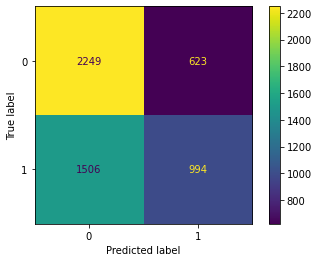

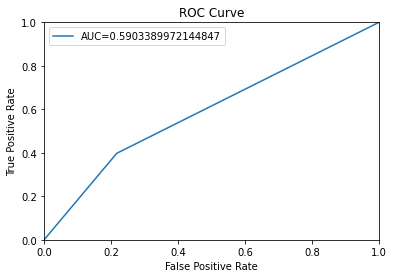

In [ ]:
print_metrics(y_test, y_pred_knn)
plot_conf_matrix(y_test, y_pred_knn)
plot_roc_curve(y_test, y_pred_knn)

Rezultati baš i nisu najbolji, zapravo su lošiji od onih koje daju neki od optimiranih algoritama iz članka.

**KNN - samo značajke 'SHOT_DIST', 'CLOSE_DEF_DIST'**

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/UZOP - projekt/PAVOS - podaci/preeprocessed.csv')

X_reduced = data.loc[:, (data.columns != 'SHOT_RESULT') & (data.columns != 'CLOSEST_DEFENDER') & (data.columns != 'player_name') & (data.columns != 'LOCATION') & (data.columns != 'W') & (data.columns != 'FINAL_MARGIN') & (data.columns != 'SHOT_NUMBER') & (data.columns != 'SHOT_CLOCK') & (data.columns != 'TOUCH_TIME') & (data.columns != 'PERIOD') & (data.columns != 'GAME_CLOCK') & (data.columns != 'DRIBBLES') & (data.columns != 'PTS_TYPE')]
y_reduced = data.loc[:, 'SHOT_RESULT']

X_reduced

,SHOT_DIST,CLOSE_DEF_DIST
0,2.3,0.4
1,8.6,1.9
2,3.1,0.3
3,5.2,1.0
4,1.1,0.3
...,...,...
107417,2.7,0.2
107418,0.2,0.2
107419,5.2,1.3
107420,5.6,0.9


In [ ]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2)

scaler = StandardScaler().fit(X_train_reduced)
X_scaled_lr_train = scaler.transform(X_train_reduced)

In [ ]:
hyperparameters_knn_reduced = {
    'n_neighbors': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1500, 2000]
}

knn_norm_reduced = KNeighborsClassifier(algorithm='brute')
model_knn_reduced = GridSearchCV(knn_norm_reduced, hyperparameters_knn_reduced, scoring='accuracy').fit(X_scaled_lr_train, y_train_reduced)
print(model_knn_reduced.best_params_)

{'n_neighbors': 500}


In [ ]:
best_model_knn_reduced = KNeighborsClassifier(n_neighbors=500, algorithm='brute').fit(X_scaled_lr_train, y_train_reduced)

In [ ]:
X_test_scaled_rd = scaler.transform(X_test_reduced)
y_pred_knn = best_model_knn_reduced.predict(X_test_scaled_rd)

Precision: 0.6392771905898398
Accuracy: 0.6184780079124971
F1 score: 0.4777983054086768
Recall: 0.3814464449191334



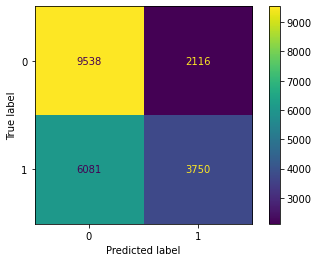

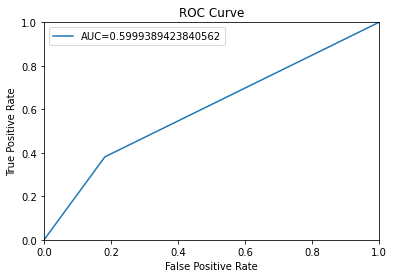

In [ ]:
print_metrics(y_test_reduced, y_pred_knn)
plot_conf_matrix(y_test_reduced, y_pred_knn)
plot_roc_curve(y_test_reduced, y_pred_knn)

KNN kad koristi samo 2 značajke daje nešto bolji rezultat.

**KNN - bez skaliranja**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [ ]:
best_model_knn_noSc = KNeighborsClassifier(n_neighbors=500, algorithm='brute').fit(X_train, y_train)
y_pred_knn = best_model_knn_noSc.predict(X_test)

Precision: 0.6193939393939394
Accuracy: 0.6144825018615041
F1 score: 0.4967193195625759
Recall: 0.41460446247464505



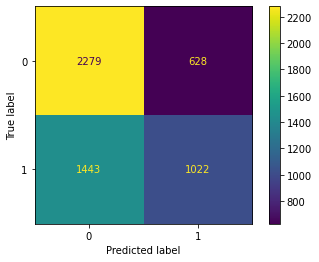

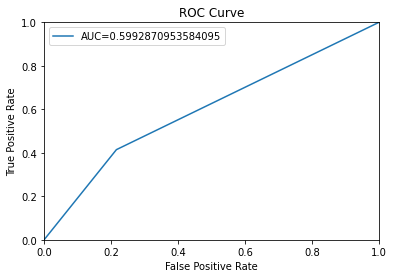

In [ ]:
print_metrics(y_test, y_pred_knn)
plot_conf_matrix(y_test, y_pred_knn)
plot_roc_curve(y_test, y_pred_knn) 

Također, koristivši algoritam KNN kada ne skaliramo značajke dobivamo bolji rezulat nego kada skaliramo, ali je i dalje sitno lošiji nego kad imamo samo 2 značajke.

**LOGISTIČKA REGRESIJA - dodatna optimizacija**

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/UZOP - projekt/PAVOS - podaci/preeprocessed.csv')

X_p = data.loc[:, (data.columns != 'SHOT_RESULT') & (data.columns != 'CLOSEST_DEFENDER') & (data.columns != 'player_name')]
y_p = data.loc[:, 'SHOT_RESULT']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size=0.05, random_state=20)

scaler = StandardScaler().fit(X_train)
X_scaled_lr_train = scaler.transform(X_train)

In [ ]:
hyperparameters_logreg = {
    'C': [1, 0.1, 0.01, 0.001, 0.0001],
    'penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'max_iter': [100, 1000],
    'l1_ratio': [0.1, 0.5, 0.9]
}

lr_model = LogisticRegression(solver='saga')
model_logreg = GridSearchCV(lr_model, hyperparameters_logreg, scoring='accuracy').fit(X_scaled_lr_train, y_train)
print(model_logreg.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/lin

{'C': 0.0001, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet'}


In [ ]:
X_test_scaled = scaler.transform(X_test)
y_pred_lr = model_logreg.predict(X_test_scaled)

Precision: 0.6252983293556086
Accuracy: 0.6317944899478779
F1 score: 0.5144820814923908
Recall: 0.4370308590492077



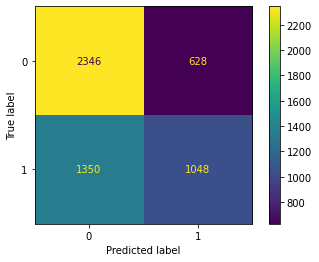

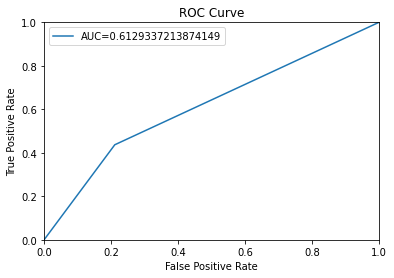

In [ ]:
print_metrics(y_test, y_pred_lr)
plot_conf_matrix(y_test, y_pred_lr)
plot_roc_curve(y_test, y_pred_lr)

Optimizacijom logističke regresije smo dobili bolje rezultate nego što ih je dao KNN.

**LOGISTIČKA REGRESIJA - samo dvije značajke**

In [ ]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2)
X_train_reduced

,SHOT_DIST,CLOSE_DEF_DIST
61364,4.8,0.7
36868,0.4,1.0
69919,6.7,2.3
42933,2.3,0.3
49298,7.4,2.3
...,...,...
13801,1.3,0.6
67154,6.7,1.4
28173,1.5,0.8
52656,7.4,3.4


In [ ]:
hyperparameters_logreg = {
    'C': [1, 0.1, 0.01, 0.001, 0.0001],
    'penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'max_iter': [100, 1000],
    'l1_ratio': [0.1, 0.5, 0.9]
}

lr_model = LogisticRegression(solver='saga')
model_logreg_lessFeat = GridSearchCV(lr_model, hyperparameters_logreg, scoring='accuracy').fit(X_train_reduced, y_train_reduced)
print(model_logreg_lessFeat.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/lin

{'C': 0.0001, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'l1'}


In [ ]:
y_pred_lr_red = model_logreg_lessFeat.predict(X_test_reduced)

Precision: 0.5819878910191726
Accuracy: 0.60363043984175
F1 score: 0.5200631199278628
Recall: 0.47004889975550124



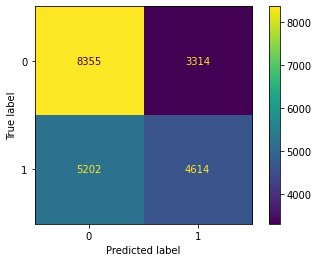

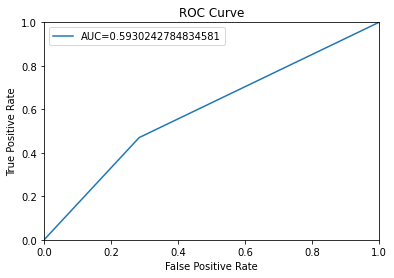

In [ ]:
print_metrics(y_test_reduced, y_pred_lr_red)
plot_conf_matrix(y_test_reduced, y_pred_lr_red)
plot_roc_curve(y_test_reduced, y_pred_lr_red)

Logistička regresija daje lošije rezultate kada se koriste samo 2 značajke. Suprotno od algoritma KNN.

**XGBClassifier optimizacija**

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.05, random_state=20)

In [ ]:
hyperparameters = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'min_child_weight': [0.0001, 0.001, 0.01, 0.1],
    'max_depth': [1, 2, 3, 4],
    'n_estimators': [1, 10, 100],
    'reg_lambda': [1, 10, 100, 1000]
}

xgb_model = XGBClassifier()
model_boosting = GridSearchCV(xgb_model, hyperparameters, scoring='accuracy').fit(X_train1, y_train1)

print(model_boosting.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 0.1, 'n_estimators': 100, 'reg_lambda': 10}


In [ ]:
y_pred_boost_scaled = model_boosting.predict(X_test1)

Precision: 0.6683748169838946
Accuracy: 0.6392405063291139
F1 score: 0.4851222104144527
Recall: 0.38073394495412843



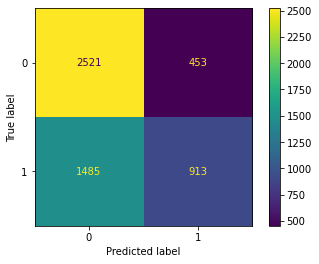

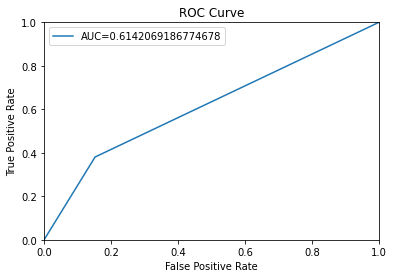

In [ ]:
print_metrics(y_test1, y_pred_boost_scaled)
plot_conf_matrix(y_test1, y_pred_boost_scaled)
plot_roc_curve(y_test1, y_pred_boost_scaled)

XGBClassifier nakon optimizacije da je najbolji rezultat do sad.

**Pokušaj kreiranja novih značajki - postotak uspješnosti šuta igrača, ovisno o udaljenosti šuta**

In [ ]:
data = pd.read_csv('data.csv')
data

In [ ]:
data['distance_interval'] = pd.cut(data['SHOT_DIST'], bins=[0, 8, 18, 24, float('inf')], labels=['0-8', '8-18', '18-24', '24+'])
distance_interval = data.groupby(['distance_interval','player_id'])[['PTS']].agg({'PTS': lambda x: (x != 0).sum()}).reset_index()
distance_interval['PTS'] = distance_interval['PTS']/data.groupby(['distance_interval','player_id']).size().reset_index(name='counts')['counts']
distance_interval = distance_interval.pivot(index='player_id',columns='distance_interval',values='PTS')
distance_interval.columns = [f'{col}_percantage' for col in distance_interval.columns]
distance_interval

In [ ]:
data_with_interval = pd.merge(data, distance_interval, on='player_id', how='left')
average_percantage = distance_interval.mean()
data_with_interval[distance_interval.columns] = data_with_interval[distance_interval.columns].fillna(average_percantage)
data_with_interval


In [ ]:
data_with_interval.to_csv("data_interval.csv", index=False)

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/UZOP - projekt/SEVKA/data_interval.csv')

In [ ]:
y = data.PTS
X = data.drop(columns=["PTS", "GAME_ID", "CLOSEST_DEFENDER_PLAYER_ID", "player_id", "distance_interval"], axis=1)

X

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,0-8_percantage,8-18_percantage,18-24_percantage,24+_percantage
0,0,1,24,1,1,69,10.8,2,1.9,7.7,2,1.3,0.583333,0.354430,0.460938,0.266055
1,0,1,24,2,1,14,3.4,0,0.8,28.2,3,6.1,0.583333,0.354430,0.460938,0.266055
2,0,1,24,3,1,0,0.0,3,2.7,10.1,2,0.9,0.583333,0.354430,0.460938,0.266055
3,0,1,24,4,2,707,10.3,2,1.9,17.2,2,3.4,0.583333,0.354430,0.460938,0.266055
4,0,1,24,5,2,634,10.9,2,2.7,3.7,2,1.1,0.583333,0.354430,0.460938,0.266055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123411,0,0,-16,5,3,112,18.3,5,6.2,8.7,2,0.8,0.591241,0.471545,0.359551,0.159091
123412,0,0,-16,6,4,688,19.8,4,5.2,0.6,2,0.6,0.591241,0.471545,0.359551,0.159091
123413,0,0,-16,7,4,670,23.0,2,4.2,16.9,2,4.2,0.591241,0.471545,0.359551,0.159091
123414,0,0,-16,8,4,157,9.1,4,4.5,18.3,2,3.0,0.591241,0.471545,0.359551,0.159091


Dodali smo 4 nove značajke koje prikazuju postotak uspješnosti šuta igrača ovisno o udaljenosti od koša.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

y_train = y_train.map({3:1, 2:1 , 0:0})
y_test = y_test.map({3:1, 2:1 , 0:0})

**Test GradientBoostingRegressora**

In [ ]:
clf = GradientBoostingRegressor(learning_rate = 0.1, n_estimators=80, max_depth = 4)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test) > 0.5


Precision: 0.6445859872611465
Accuracy: 0.6243720628747367
F1 score: 0.4661446338093045
Recall: 0.36507936507936506



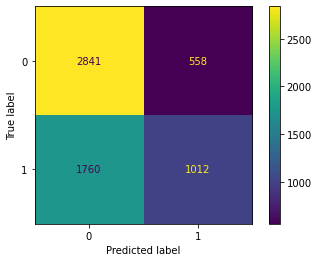

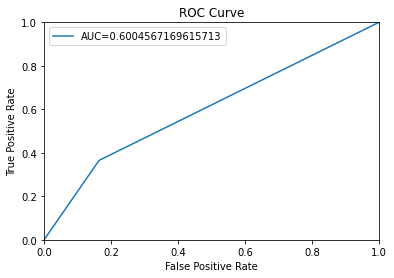

In [ ]:
print_metrics(y_test, y_predicted)
plot_conf_matrix(y_test, y_predicted)
plot_roc_curve(y_test, y_predicted)

Nad tim podacima niti algoritmi nisu dali bolje rezultate, a također ostavljamo ispis novo korištenog algoritma GradientBoosting regressora koji se pokazao najboljim na ovom skupu, međutim, nije bolji od prethodne logističke regresije niti XGBClassifier-a.

**Pokušat ćemo još sličnu stvar s dodavanjem značajki - ovoga puta ne po udaljenosti od koša nego samo općenito po efikasnosti kako je objašnjeno ispod.**

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/UZOP - projekt/KROGG/final_data_changed_test.csv")

### Features created

#### Shooter efficiency and defender efficiency

Added two features: shooter_efficiency and defender_efficiency. Shooter efficiency is calculated as (number of shots succeeded / total number of shots). If shot is 3 point shot it calculates players 3 point shot efficiency, and if shot is 2 point shot it calculates 2 point efficiency. Defender efficiency is calculated as (number of missed shots vs defender / total number of shots vs defender).

#### Tip - in

Tip-ins - a player near the hoop collects an offensive rebound after a teammate missed a shot. In this situation, the shot clock would reset on hitting the rim!

In [ ]:
df['tip-in'] = 0
df.loc[df['SHOT_CLOCK'] >= 23, 'tip-in'] = 1

In [ ]:
df.head()

,Unnamed: 0,LOCATION,WIN_LOSE,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,PTS_TYPE,SHOT_RESULT,shooter_efficiency,defender_efficiency,SHOT_DISTANCE_METERS,CLOSEST_DEF_DIST_METERS,tip-in
0,0,0,1,24,1,1,651,10.8,2,1.9,2,0,0.456621,0.548556,2.346845,0.396221,0
1,1,0,1,24,2,1,706,3.4,0,0.8,3,1,0.322368,0.593750,8.594941,1.859189,0
2,2,0,1,24,3,1,720,0.0,3,2.7,2,1,0.456621,0.593750,3.078330,0.274307,0
3,3,0,1,24,4,2,733,10.3,2,1.9,2,1,0.456621,0.540000,5.242304,1.036269,0
4,4,0,1,24,5,2,806,10.9,2,2.7,2,1,0.456621,0.518797,1.127705,0.335264,0


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.loc[df['SHOT_RESULT'] == 1, 'SHOT_RESULT'] = -1
df.loc[df['SHOT_RESULT'] == 0, 'SHOT_RESULT'] = 1
df = df.loc[df.defender_efficiency.notnull(), :]
df = df.loc[df.shooter_efficiency.notnull(), :]

In [ ]:
df = df.reindex(columns=sorted(df.columns))
df = df.reindex(columns=(['SHOT_RESULT'] + list([a for a in df.columns if a != 'SHOT_RESULT'])))

In [ ]:
df.head()

,SHOT_RESULT,CLOSEST_DEF_DIST_METERS,DRIBBLES,FINAL_MARGIN,GAME_CLOCK,LOCATION,PERIOD,PTS_TYPE,SHOT_CLOCK,SHOT_DISTANCE_METERS,SHOT_NUMBER,TOUCH_TIME,WIN_LOSE,defender_efficiency,shooter_efficiency,tip-in
0,1,0.396221,2,24,651,0,1,2,10.8,2.346845,1,1.9,1,0.548556,0.456621,0
1,-1,1.859189,0,24,706,0,1,3,3.4,8.594941,2,0.8,1,0.593750,0.322368,0
2,-1,0.274307,3,24,720,0,1,2,0.0,3.078330,3,2.7,1,0.593750,0.456621,0
3,-1,1.036269,2,24,733,0,2,2,10.3,5.242304,4,1.9,1,0.540000,0.456621,0
4,-1,0.335264,2,24,806,0,2,2,10.9,1.127705,5,2.7,1,0.518797,0.456621,0


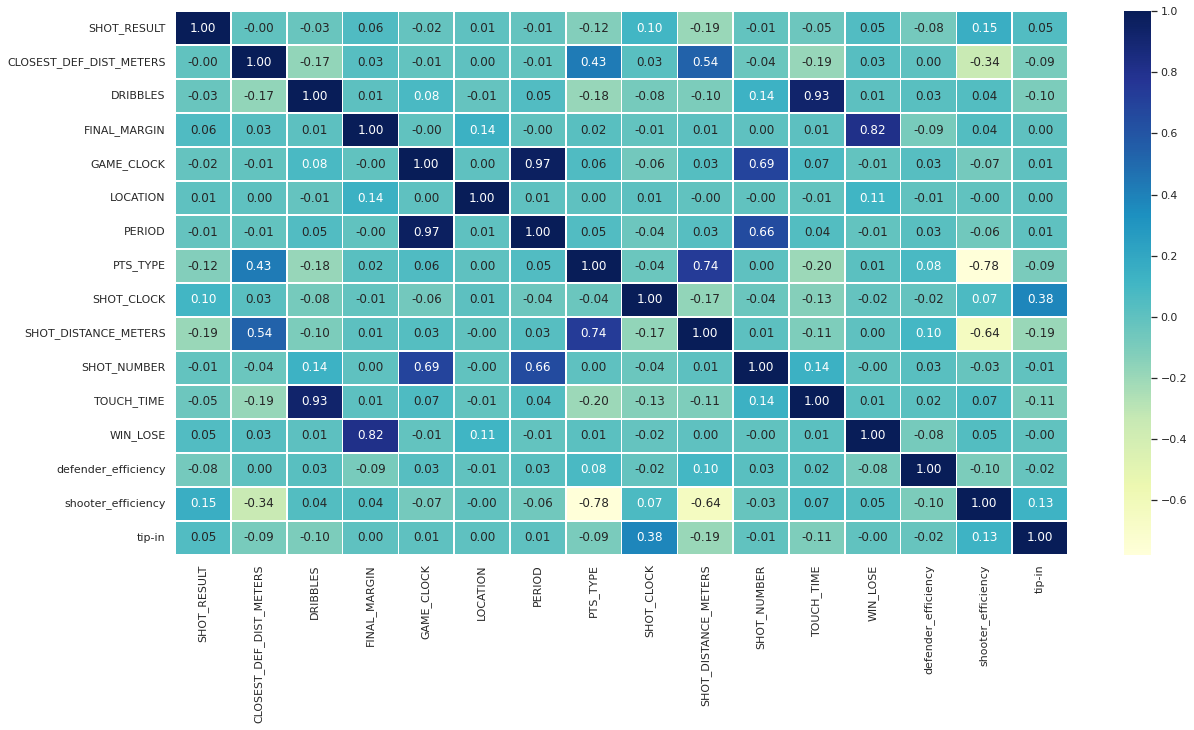

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

In [ ]:
Y = df.iloc[:,0]

In [ ]:
Y.head()

0    1
1   -1
2   -1
3   -1
4   -1
Name: SHOT_RESULT, dtype: int64

In [ ]:
X = df.drop(df.columns[[0]],axis=1)

In [ ]:
X.head()

,CLOSEST_DEF_DIST_METERS,DRIBBLES,FINAL_MARGIN,GAME_CLOCK,LOCATION,PERIOD,PTS_TYPE,SHOT_CLOCK,SHOT_DISTANCE_METERS,SHOT_NUMBER,TOUCH_TIME,WIN_LOSE,defender_efficiency,shooter_efficiency,tip-in
0,0.396221,2,24,651,0,1,2,10.8,2.346845,1,1.9,1,0.548556,0.456621,0
1,1.859189,0,24,706,0,1,3,3.4,8.594941,2,0.8,1,0.593750,0.322368,0
2,0.274307,3,24,720,0,1,2,0.0,3.078330,3,2.7,1,0.593750,0.456621,0
3,1.036269,2,24,733,0,2,2,10.3,5.242304,4,1.9,1,0.540000,0.456621,0
4,0.335264,2,24,806,0,2,2,10.9,1.127705,5,2.7,1,0.518797,0.456621,0


### Correlated features
Maybe it could help to diagnose and remove correlated features because they can cause problems with convergence and can reduce the model's ability to generalize to new data. Additionally, using correlated features can inflate the importance of those features, making it difficult to interpret the model's results.

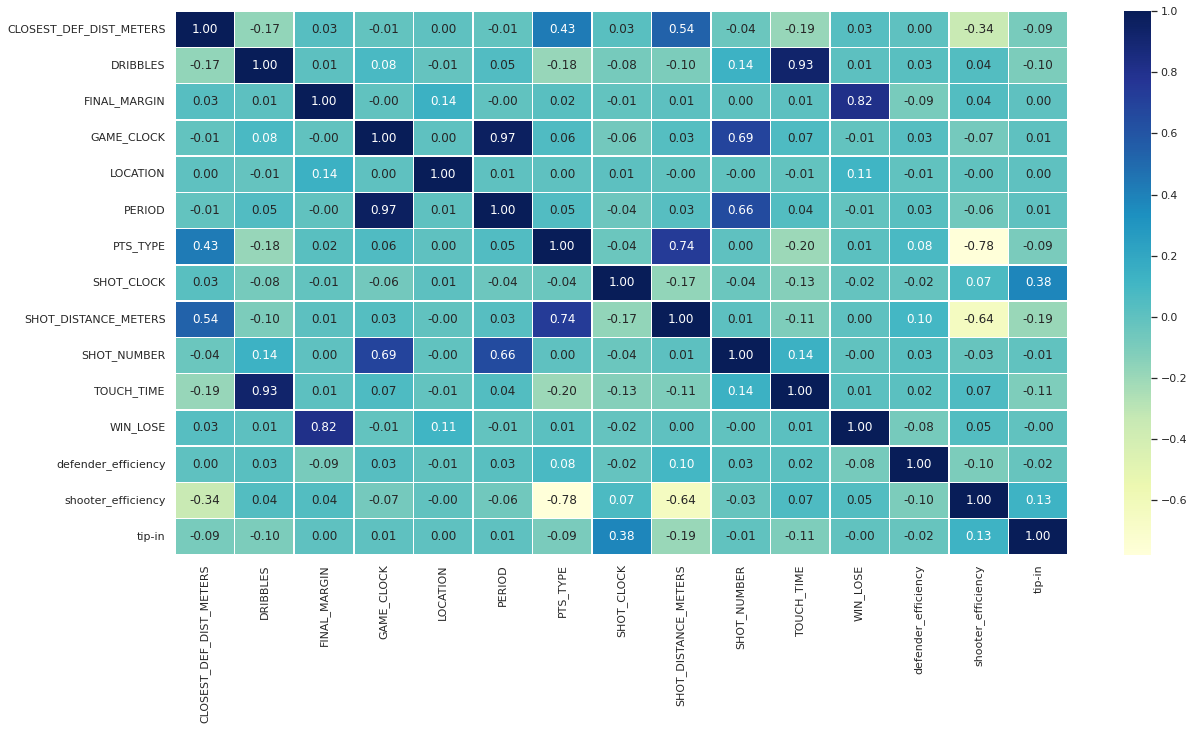

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

In [ ]:
X = X.drop('TOUCH_TIME', axis=1)
X = X.drop('PERIOD', axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=0)

### MinMaxScaler
This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

### AdaBoostClassifier

In [ ]:
scaler = MinMaxScaler()
import warnings
with warnings.catch_warnings(record=True):
    parameters_for_testing = {
        'learning_rate':[0.001,0.01,0.1,1],
        'n_estimators':[1,5,10,100,200,500,1000]
    }
    xgb_model = AdaBoostClassifier()

    gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, scoring='accuracy')
    gsearch1.fit(scaler.fit_transform(X_train), Y_train)

In [ ]:
print('Best parameters found: ' + str(gsearch1.best_params_))
print('Best score with best found parameters: ' + str(gsearch1.best_score_))

Best parameters found: {'learning_rate': 0.1, 'n_estimators': 500}
Best score with best found parameters: 0.61978572503041


In [ ]:
model = AdaBoostClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
print(X_train)
model.fit(scaler.fit_transform(X_train), Y_train)

        CLOSEST_DEF_DIST_METERS  DRIBBLES  FINAL_MARGIN  GAME_CLOCK  LOCATION  \
100436                 1.310576         0            19         262         0   
50651                  0.335264         3             6        1569         0   
75795                  0.853398         2             2         149         0   
70305                  0.152393         2           -11        2271         0   
55833                  1.889668         0            13         755         0   
...                         ...       ...           ...         ...       ...   
45904                  2.133496         0            -5        1822         0   
117993                 1.249619         2           -22        1761         0   
42626                  1.158183         2            -2        2471         1   
43580                  1.158183        12             9         856         1   
68286                  1.920146         1            -2        1793         1   

        PTS_TYPE  SHOT_CLOC

AdaBoostClassifier(learning_rate=0.1, n_estimators=500, random_state=0)

In [ ]:
print(model)

AdaBoostClassifier(learning_rate=0.1, n_estimators=500, random_state=0)


In [ ]:
y_pred = model.predict(scaler.transform(X_test))
#predictions = [round(value) for value in y_pred]
print(y_pred)

[-1 -1 -1 ... -1 -1 -1]


Precision: 0.6185622317596566
Accuracy: 0.629126213592233
F1 score: 0.5015224010439322
Recall: 0.4217264081931236



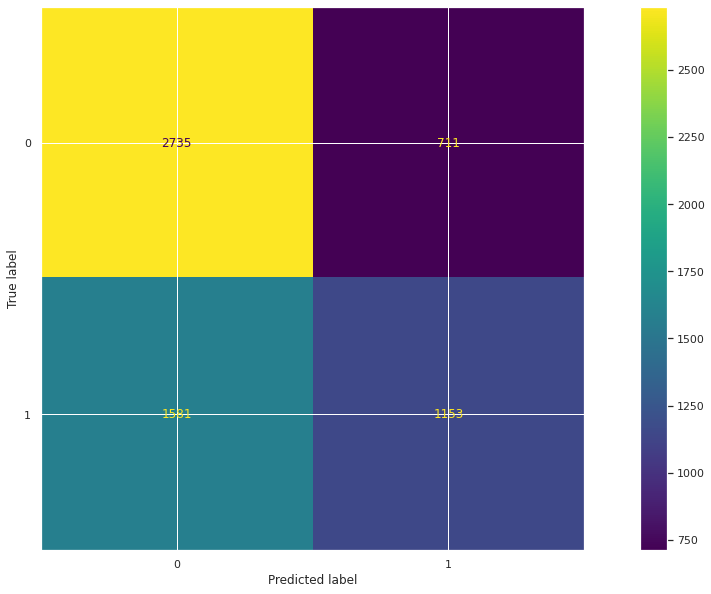

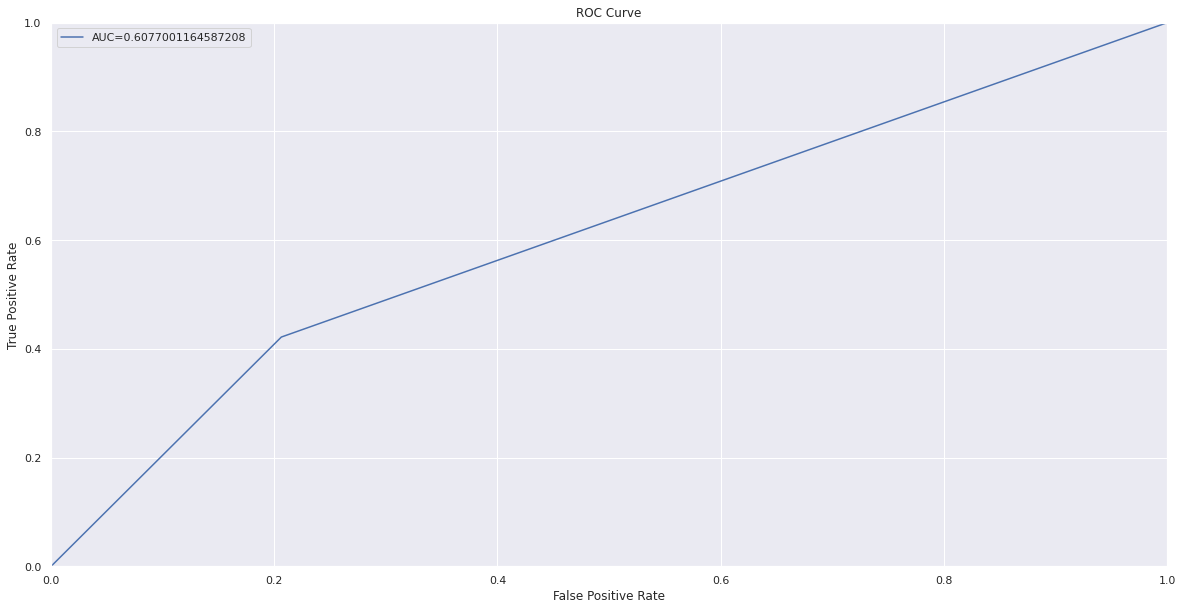

In [ ]:
print_metrics(Y_test, y_pred)
plot_conf_matrix(Y_test, y_pred)
plot_roc_curve(Y_test, y_pred)

### Confusion matrix

Confusion matrix is computed to evaluate the accuracy of a classification.
By definition a confusion matrix C is such that Ci,j is equal to the number of observations known to be in group i and predicted to be in group j.
Thus in binary classification, the count of true negatives is C0,0, false negatives is C1,0, true positives is C1,1 and false positives is C0,1.

### ZAKLJUČAK

Rezultati su poboljšani u odnosu na rezultate članka, nažalost ne značajno. Novo isprobani algoritmi nisu pokazali veću efikasnost, štoviše pokazali su manju. Najbolji rezultat dobiven je modelom XGBClassier, dok je drugi najbolji rezultat dala logistička regresija, a nakon nje AdaBoosting algoritam.

Sama priroda ovog problema je takva da je zaista teško dobiti bolje rezultate te se ovi rezultati mogu poistovjetiti sa state-of-the-art rezultatima dobivenim na ovom skupu podataka.